In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [2]:
#set_nb_theme('chesterish')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
%config InlineBackend.figure_format = 'retina' # To display retina quality plots

In [4]:
train = pd.read_csv('train.csv')
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#print(train.columns)
print(train.dtypes)
'''
Need to convert Sex dtype into Integer
'''

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


'\nNeed to convert Sex dtype into Integer\n'

### What is the Challenge?
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Variable Breakdown

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [6]:
#train.head(10)

# Plot Functions

In [7]:
# Count plot graph function below
def countplot(column, data_frame, plot_title):
    
    plt.figure(
        figsize = (
            5,
            2.5
        )
    )
    sns.countplot(
        x = column,
        data = data_frame,
        palette = 'Paired'
    ).set(
        title=plot_title
        )
    sns.set_style(
        'darkgrid'
    )
    return plt.show()

# Histogram plot graph function below
def histo(
    column, 
    data, 
    fig_width, 
    fig_height, 
    bins_num, 
    plot_title,
    title_size,
    xlabel_title, 
    xlabel_size,
    ylabel_title,
    ylabel_size
):
    plt.figure(
        figsize = (
            fig_width,
            fig_height
        )
    )
    plt.hist(
        x = data[column],
        bins = bins_num
    )
    plt.title(
        plot_title,
        fontsize = title_size
    )
    plt.xlabel(
        xlabel_title,
        fontsize = xlabel_size
    )
    plt.ylabel(
        ylabel_title,
        fontsize = ylabel_size
    )
    
    return plt.show()

## How many Men & Women were in the Titanic?
Below the graph shows there are more than 500 men and about 300 women in the dataset.

In [8]:
print(train['Sex'].value_counts().sum())
train['Sex'].value_counts()

891


male      577
female    314
Name: Sex, dtype: int64

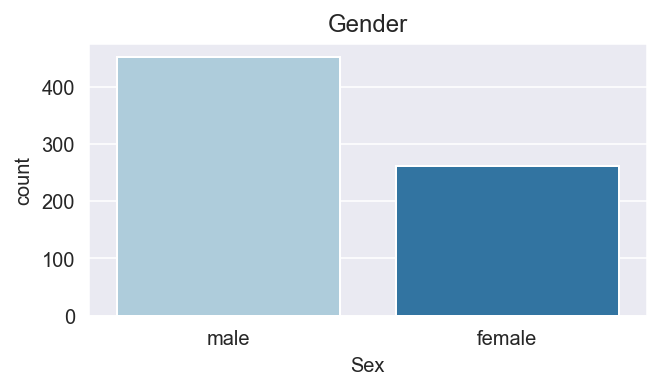

In [36]:
countplot('Sex', train, 'Gender')

#### Carriage Class
We can see from the data that there are more people in 3rd class, then followed by 1st and 2nd class.

3    491
1    216
2    184
Name: Pclass, dtype: int64


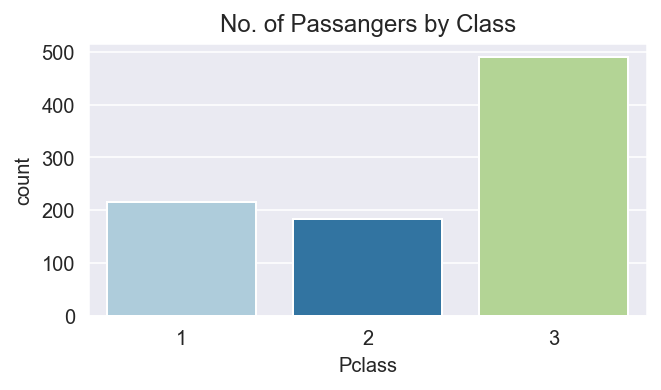

In [10]:
print(train['Pclass'].value_counts())
countplot('Pclass', train, 'No. of Passangers by Class')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


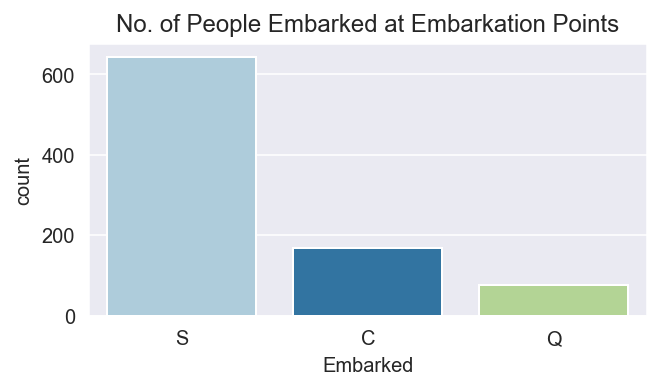

In [11]:
print(train['Embarked'].value_counts())
countplot('Embarked', train, 'No. of People Embarked at Embarkation Points')

# How many Survived/Did Not Survive?
The data shows us that slightly over 300 passangers survived and over 500 died.

891
0    549
1    342
Name: Survived, dtype: int64


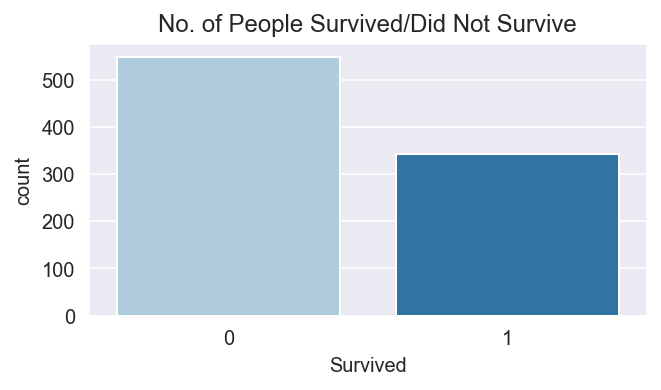

In [12]:
# 0 = Did not Survive
# 1 = Survive
print(train['Survived'].value_counts().sum())
print(train['Survived'].value_counts())
countplot('Survived', train, 'No. of People Survived/Did Not Survive')

## How many survived - or did not survive (based on gender?)
Below we'll be taking a more granular look at how many of those who survived/did not survive were Male or Female

These numbers below are before removing any NA values to give a more accurate picture.

In [13]:
print(train[train['Survived']==0].count())
print('*'*100)
print(train[train['Survived']==1].count())

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64
****************************************************************************************************
PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64


In [14]:
'''
How many were Male and Female that died?
How many were Male and Female that survived?
'''
not_survived = train[train['Survived']==0]
survived = train[train['Survived']==1]

### Survived, Male and Female
We can see that more Females survived than Males. The reason for this can vary, from social cultural norms such as chivalry, to potentially other unforseen circumstances that placed Females in a better position to survive.

This is more surprising given that the data set has over 550 Males and over 300 Females.

0


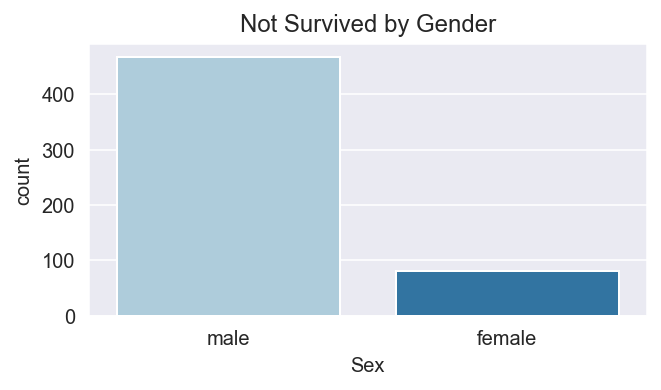

In [15]:
print(not_survived['Survived'].sum()) # Quick sense check
countplot('Sex', not_survived, 'Not Survived by Gender')

342


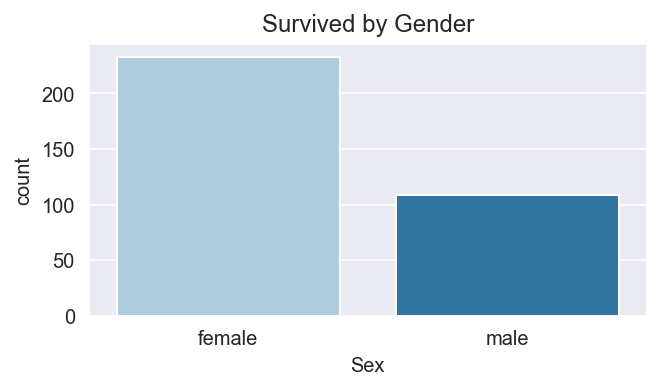

In [16]:
print(survived['Survived'].sum()) # Quick sense check
countplot('Sex', survived, 'Survived by Gender')

## How many survived - or did not survive (based on Ticket Class?)
Below we will look at the ratio of those who survived and those who did not survive based on ticket class.

In [17]:
ns_pclass1 = not_survived[not_survived['Pclass']==1]
ns_pclass2 = not_survived[not_survived['Pclass']==2]
ns_pclass3 = not_survived[not_survived['Pclass']==3]
'''
Used the below to check the above was filtering as expected

print(ns_pclass1['Pclass'].unique())
print(ns_pclass2['Pclass'].unique())
print(ns_pclass3['Pclass'].unique())
'''

"\nUsed the below to check the above was filtering as expected\n\nprint(ns_pclass1['Pclass'].unique())\nprint(ns_pclass2['Pclass'].unique())\nprint(ns_pclass3['Pclass'].unique())\n"

## Did not survive, from different Ticket Class
We can see that the majority of those who did not survive had purchased 3rd class tickets, followed by those who purchased 2nd class and finally those who purchased 1st class tickets.

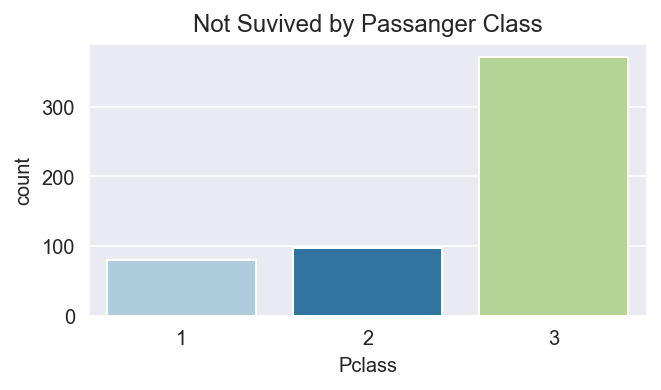

In [18]:
countplot('Pclass', not_survived, 'Not Suvived by Passanger Class')

## Survived, from different Ticket Class
We can see that the majority of who survived purchased a 1st class ticket, follwed by those who purchased a 3rd class and then a 2nd class

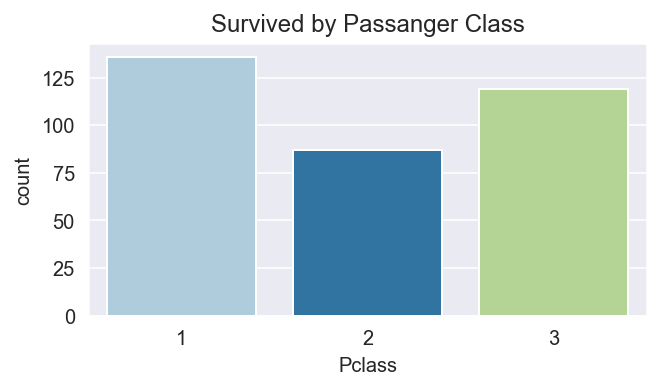

In [19]:
countplot('Pclass', survived, 'Survived by Passanger Class')

## How many survived or did not survive based on different embarkation ports

### Did Not Survive from Embarkation Ports

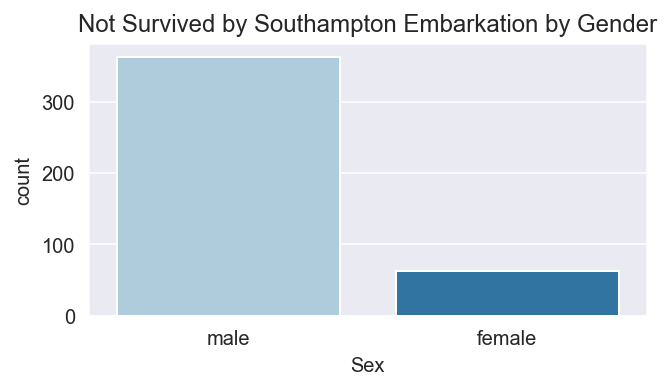

In [20]:
not_survived_south = not_survived[not_survived['Embarked']=='S']
countplot('Sex',not_survived_south, 'Not Survived by Southampton Embarkation by Gender')

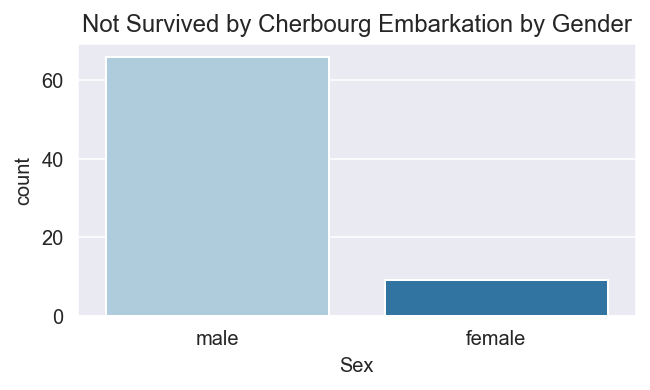

In [21]:
not_survived_south = not_survived[not_survived['Embarked']=='C']
countplot('Sex',not_survived_south, 'Not Survived by Cherbourg Embarkation by Gender')

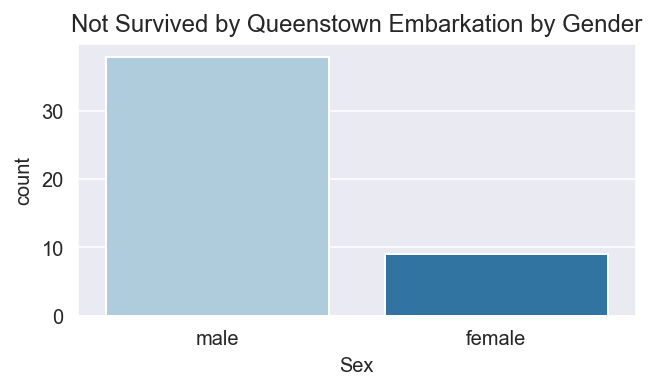

In [22]:
not_survived_south = not_survived[not_survived['Embarked']=='Q']
countplot('Sex',not_survived_south, 'Not Survived by Queenstown Embarkation by Gender')

### Southampton Embarkation Point
We can see that the majority of those who Survived and embarked from Southampton were Females

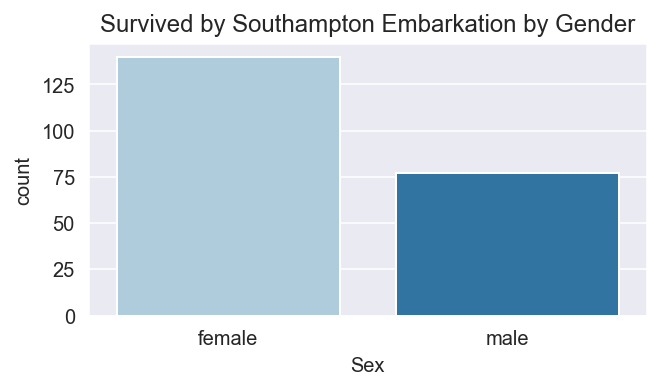

In [23]:
#survived_south = survived[(survived['Embarked']=='S') & (survived['Sex']=='male')]
survived_south = survived[survived['Embarked']=='S']
countplot('Sex',survived_south, 'Survived by Southampton Embarkation by Gender')

### Cherbourg Embarkation Point


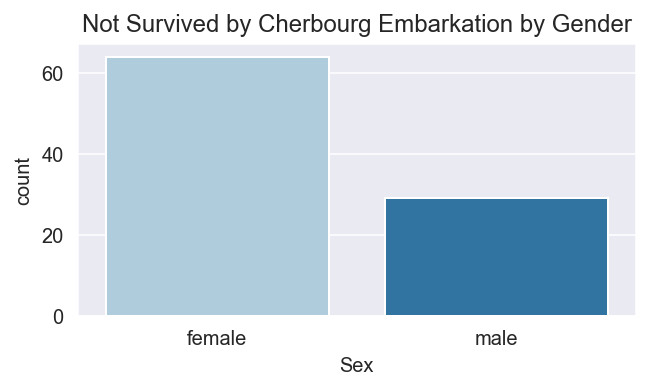

In [24]:
survived_cher = survived[survived['Embarked']=='C']
countplot('Sex',survived_cher, 'Not Survived by Cherbourg Embarkation by Gender')

### Queenstown Embarkation Point

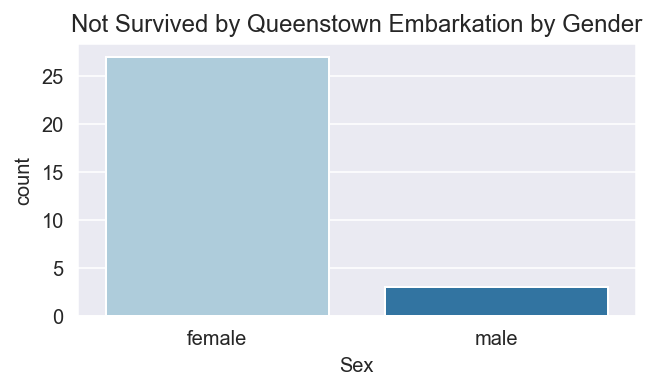

In [25]:
survived_que = survived[survived['Embarked']=='Q']
countplot('Sex',survived_que, 'Not Survived by Queenstown Embarkation by Gender')

## Survived by Age Group

### Below what I can do is begin grouping by age, to do this first I need to convert the age values into integers
### To do this I need to first create buckets for different age groups.

In [41]:
print(not_survived.shape)
print(survived.shape)

print('Max Age for Not Survived: \n', not_survived['Age'].max())
print('Max Age for Survived: \n',survived['Age'].max())
print('Min Age for Not Survived: \n', not_survived['Age'].min())
print('Min Age for Survived: \n',survived['Age'].min())

(424, 11)
(288, 11)
Max Age for Not Survived: 
 74.0
Max Age for Survived: 
 80.0
Min Age for Not Survived: 
 1.0
Min Age for Survived: 
 0.42


CHILD: <= 5 years old
TEENAGE: >=9 - <=17
YOUNG ADULT: >=18 - <=29 
ADULT: >= 30 - <=59
SENIOR: >= 60 

In [27]:
'''
I encountered a problem here when trying to convert the Age column from a Float into an Integer using
as().

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

So what I need to do before I convert this datatype is to get rid of NaN/Na from the data
'''

#Drop Cabin column, not needed
not_survived = not_survived.drop('Cabin',axis = 1)
survived = survived.drop('Cabin',axis = 1)
print("NOT-SURVIVED NA SUM:\n", not_survived.isna().sum())

print('*'*100)

print("SURVIVED NA SUM:\n", survived.isna().sum())

print('*'*100)

print("SURVIVED DATAFRAME COLUMNS:\n", survived.columns)

print('*'*100)

not_survived.dropna(inplace = True)
survived.dropna(inplace = True)
print("NOT-SURVIVED NA SUM:\n", not_survived.isna().sum())

print('*'*100)

print("NOT-SURVIVED SHAPE:\n", not_survived.shape)

print('*'*100)  

print("SURVIVED SHAPE:\n", survived.shape)

print('*'*100)

print("NOT-SURVIVED NA SUM:\n", not_survived.isna().sum())

print('*'*100)


print("SURVIVED NA SUM\n ", survived.isna().sum())

NOT-SURVIVED NA SUM:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
****************************************************************************************************
SURVIVED NA SUM:
 PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            52
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64
****************************************************************************************************
SURVIVED DATAFRAME COLUMNS:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
****************************************************************************************************
NOT-SURVIVED NA SUM:
 PassengerId    0
Survived    

In [28]:
# Convert the Age column from Float into Integer
not_survived['Age'].astype(int)
print("NOT-SURVIVED GROUPBY SUM:\n", not_survived.groupby('Age').sum())
print("NOT-SURVIVED UNIQUE:\n", not_survived['Age'].unique())
'''
I need to remove periods and .5 values from Age column.

What I can do then is group ages into categories e.g. Infants, Adolescents, Young Adults, Adults and Elderly.
I can bucket the ages and then split see the number of those who survived and did not survive.
'''


NOT-SURVIVED GROUPBY SUM:
       PassengerId  Survived  Pclass  SibSp  Parch      Fare
Age                                                        
1.0           552         0       6      9      3   86.5875
2.0          2117         0      19     19     10  311.0750
3.0           375         0       3      3      1   21.0750
4.0          1087         0       9     11      5   88.3000
6.0           814         0       3      4      2   31.2750
...           ...       ...     ...    ...    ...       ...
66.0           34         0       2      0      0   10.5000
70.0         1419         0       3      1      1   81.5000
70.5          117         0       3      0      0    7.7500
71.0          591         0       2      0      0   84.1584
74.0          852         0       3      0      0    7.7750

[77 rows x 6 columns]
NOT-SURVIVED UNIQUE:
 [22.  35.  54.   2.  20.  39.  14.  31.   8.  19.  40.  66.  28.  42.
 21.  18.  27.   7.  65.  28.5 11.  45.   4.  26.  32.  16.  25.  24.
 29.  46

'\nI need to remove periods and .5 values from Age column.\n\nWhat I can do then is group ages into categories e.g. Infants, Adolescents, Young Adults, Adults and Elderly.\nI can bucket the ages and then split see the number of those who survived and did not survive.\n'

29.69911764705882


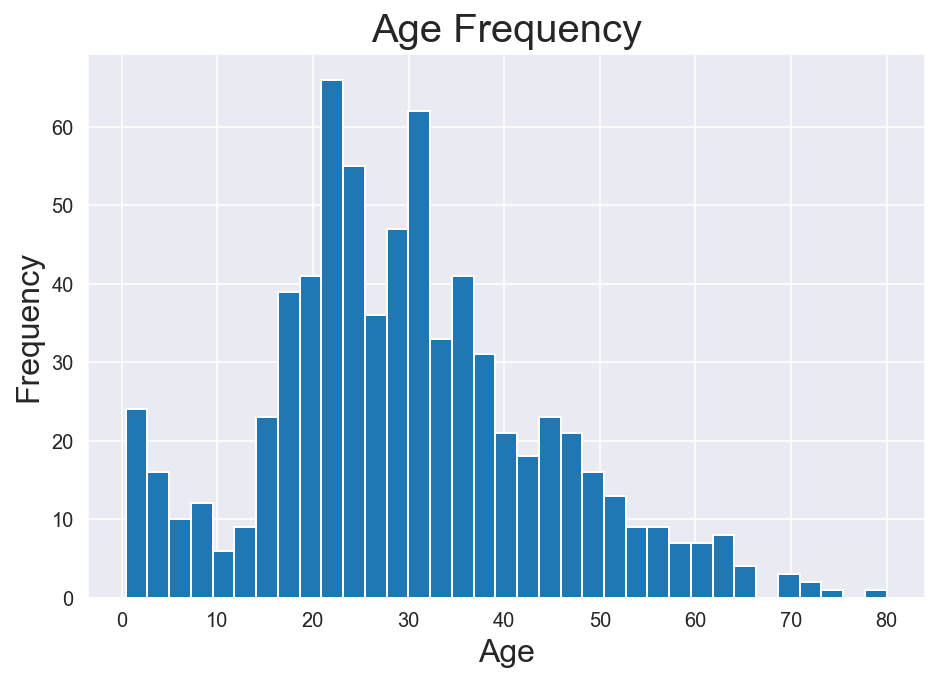

In [29]:
print(train['Age'].mean())
histo(
    column = 'Age',
    data = train, 
    fig_width = 7.5, 
    fig_height = 5, 
    bins_num = 35, 
    plot_title = 'Age Frequency',
    title_size = 20,
    xlabel_title = 'Age', 
    xlabel_size = 16,
    ylabel_title = 'Frequency',
    ylabel_size = 16
)

32.204207968574636


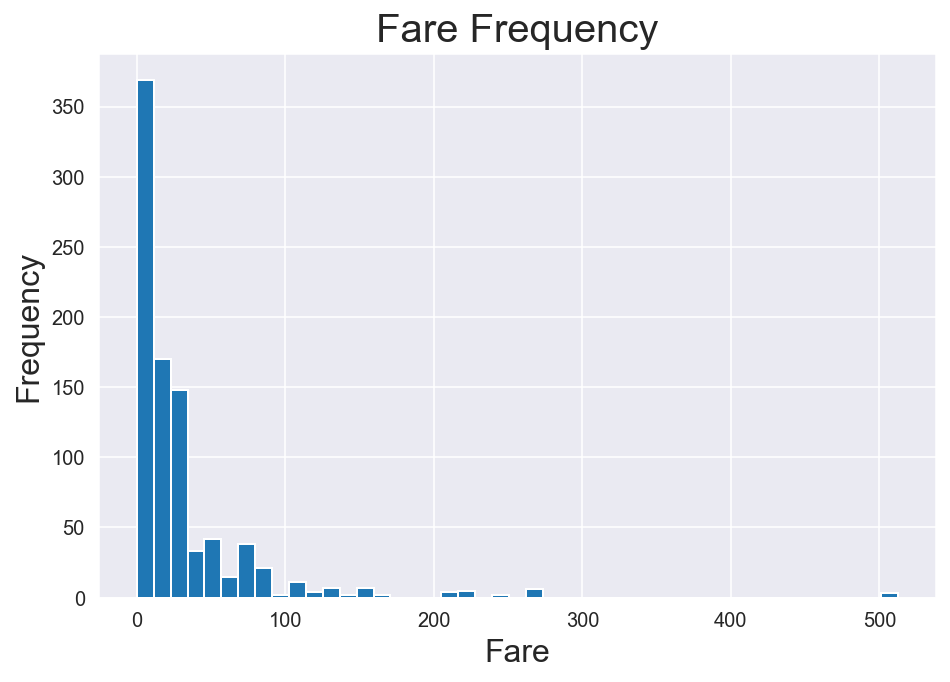

In [30]:
print(train['Fare'].mean())
histo(
    column = 'Fare',
    data = train, 
    fig_width = 7.5, 
    fig_height = 5, 
    bins_num = 45, 
    plot_title = 'Fare Frequency',
    title_size = 20,
    xlabel_title = 'Fare', 
    xlabel_size = 16,
    ylabel_title = 'Frequency',
    ylabel_size = 16
)

In [31]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [32]:
#Age/Survived Correlation
age_survive_corr = train['Age'].corr(
    other =  train['Survived'],
    method = 'pearson'
)
print('Age and Survived Correlation Value: ',age_survive_corr)

#PClass/Survived Correlation

'''
1st Class
2nd Class
3rd Class
'''
pclass_survived_corr = train['Pclass'].corr(
    other = train['Survived'],
    method = 'pearson'
)
print('PClass and Survived Correlation Value: ',pclass_survived_corr)

#Fare/Survived Correlation
fare_survived_corr = train['Fare'].corr(
    other = train['Survived'],
    method = 'pearson'
)
print('Fare and Survived Correlation Value: ',fare_survived_corr)


Age and Survived Correlation Value:  -0.07722109457217764
PClass and Survived Correlation Value:  -0.3384810359610153
Fare and Survived Correlation Value:  0.2573065223849624


In [33]:
print(train['Age'].isna().sum())
train.dropna(subset=['Age'], inplace = True)
print(train['Age'].isna().sum())

177
0


In [34]:
'''
Because of the NAN in the column data for Age the regression modelling
wasn't working, so I needed to to drop NA from that subset column

'''
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(
    train['Age'],
    train['Survived']
)

line_age_survived = f'Regression line: y = {intercept:.2f} + {slope:.2f}x, r={r_value:.2f}'
print(line_age_survived)

Regression line: y = 0.48 + -0.00x, r=-0.08


In [35]:
slope, intercept, r_value, p_value, stderr = scipy.stats.linregress(
    train['Pclass'],
    train['Survived']
)

line_pclass_survived = f'Regression line: y = {intercept:.2f} + {slope:.2f}x, r={r_value:.2f}'
print(line_pclass_survived)

Regression line: y = 0.88 + -0.21x, r=-0.36
